## Possum Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from icecream import ic
ic.enable()

import re

In [2]:
d = pd.read_csv('possum.csv')

# Deal with NAs; there's only 2
d = d.dropna()

In [3]:
d.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
ic(d['case'].value_counts());

ic| d['case'].value_counts(): 1      1
                              68     1
                              78     1
                              77     1
                              76     1
                                    ..
                              32     1
                              31     1
                              30     1
                              29     1
                              104    1
                              Name: case, Length: 101, dtype: int64


In [6]:
pattern = re.compile('float')
float_feats = [d.dtypes.index[i] for i in range(d.dtypes.size) \
         if pattern.search(str(d.dtypes.values[i])) is not None]

ic(float_feats);

ic| float_feats: ['age',
                  'hdlngth',
                  'skullw',
                  'totlngth',
                  'taill',
                  'footlgth',
                  'earconch',
                  'eye',
                  'chest',
                  'belly']


['age',
 'hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

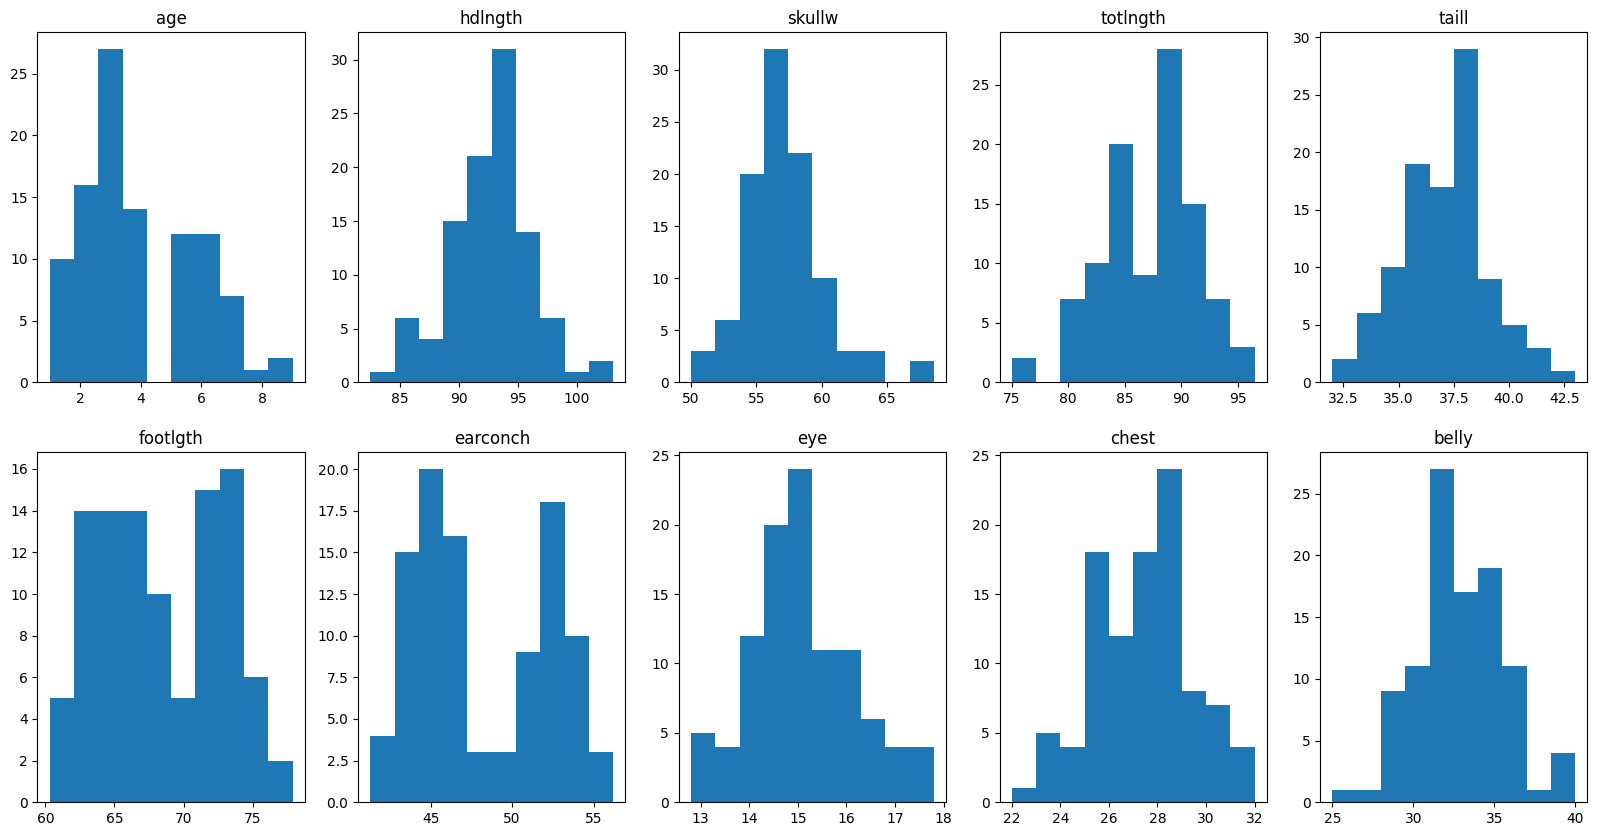

In [30]:
# Distribution of real-valued features (and age)
half = int(len(float_feats) / 2)
fig, ax = plt.subplots(2, half, figsize = (20,10))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if i == 0:
            ax[i,j].hist(x = d[float_feats[j]])
            ax[i,j].set_title(f'{float_feats[j]}')
        if i == 1:
            ax[i,j].hist(x = d[float_feats[j + ax.shape[1]]])
            ax[i,j].set_title(f'{float_feats[j + ax.shape[1]]}')

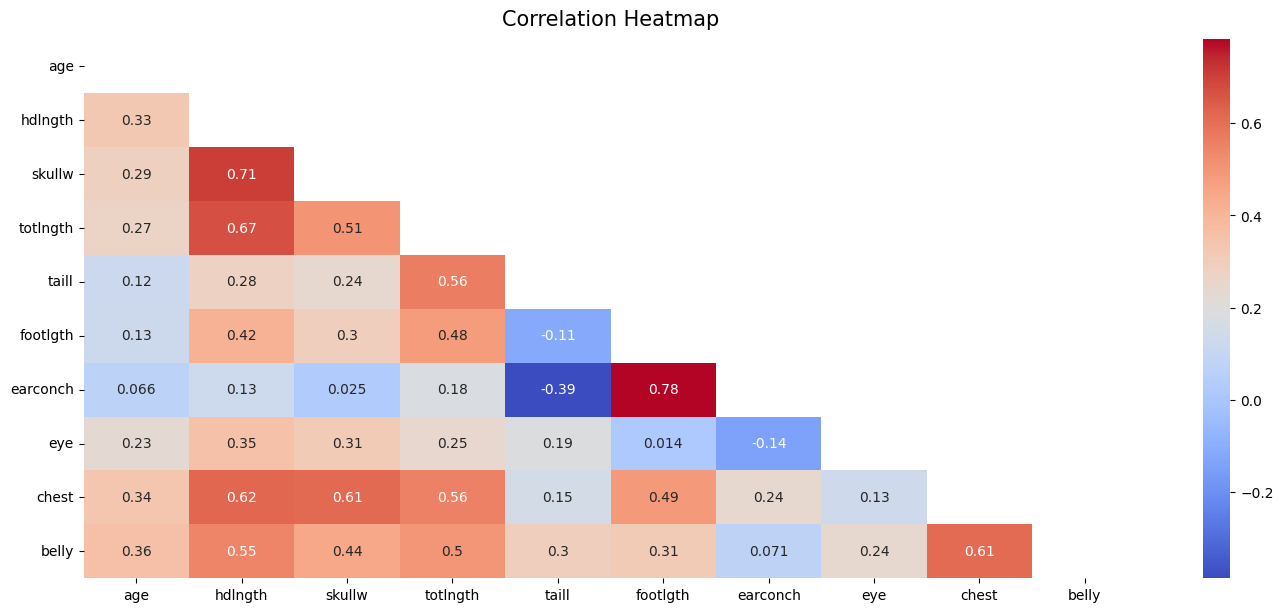

In [7]:
def half_heatmap(data):
    plt.figure(figsize=(17, 7))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(data.corr()))
    heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=10)
    
half_heatmap(d[float_feats])

**As seen in the heatmap and from the below figure, we observe that age from 1 y/o and beyond is not a strong determination of any of the features, with belly size being the highest moderate correlation.**

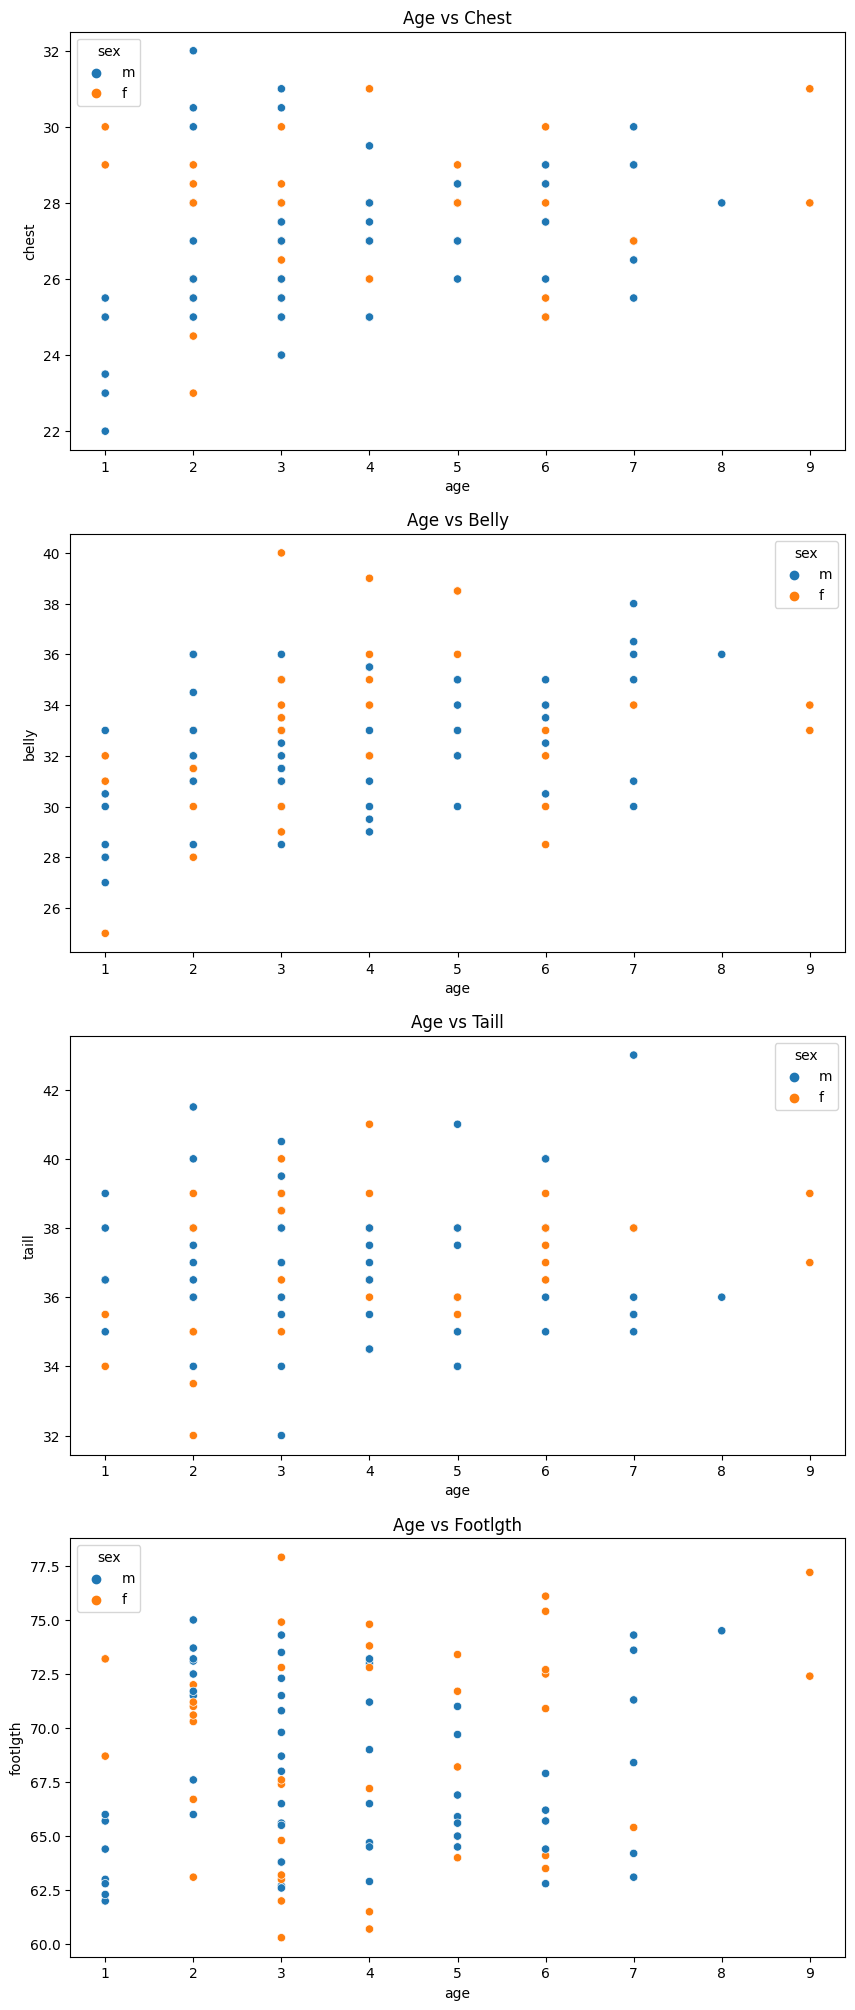

In [8]:
features = ['chest', 'belly', 'taill', 'footlgth']
x = 'age'
fig, ax = plt.subplots(len(features),1, figsize = (10,25))
for i, y in zip(range(len(features)), features):
    sns.scatterplot(data = d, x = x, y = y, hue = 'sex', ax = ax[i])
    ax[i].set_title(f'{x[0].upper() + x[1:]} vs {y[0].upper() + y[1:]}')
# Add comment for test

**Observations from the below figure:**
- **as noted on the heatmap there is a moderate correlation between belly and chest size for both male and female possums.**
- **belly is not a strong determination of any of the features, otherwise, and there is not a big distinction among many and female possums**

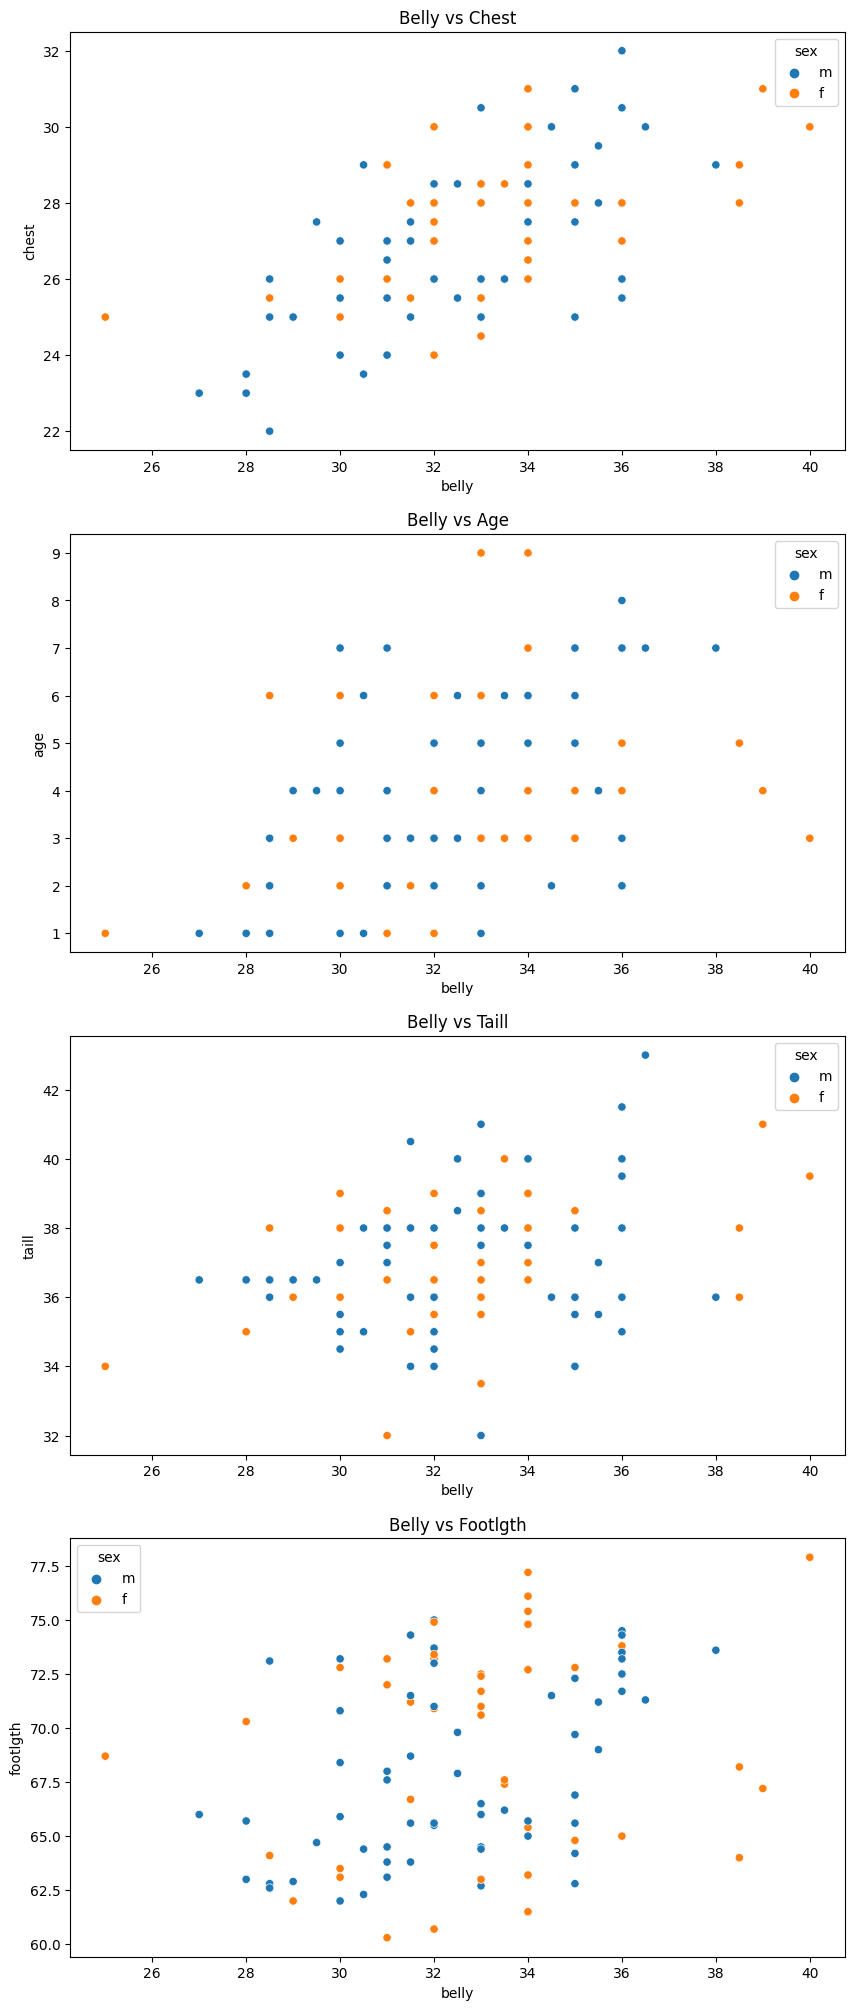

In [9]:
# Scatterplot of x = 'belly' vs. y = feature
features = ['chest', 'age', 'taill', 'footlgth']
x = 'belly'
fig, ax = plt.subplots(len(features),1, figsize = (10,25))
for i, y in zip(range(len(features)), features):
    sns.scatterplot(data = d, x = x, y = y, hue = 'sex', ax = ax[i])
    ax[i].set_title(f'{x[0].upper() + x[1:]} vs {y[0].upper() + y[1:]}')

**In the figure below we observe a strong distinction among Victorian (Vic) possums "Other" possum populations in `belly` size and foot length `footlgth`**

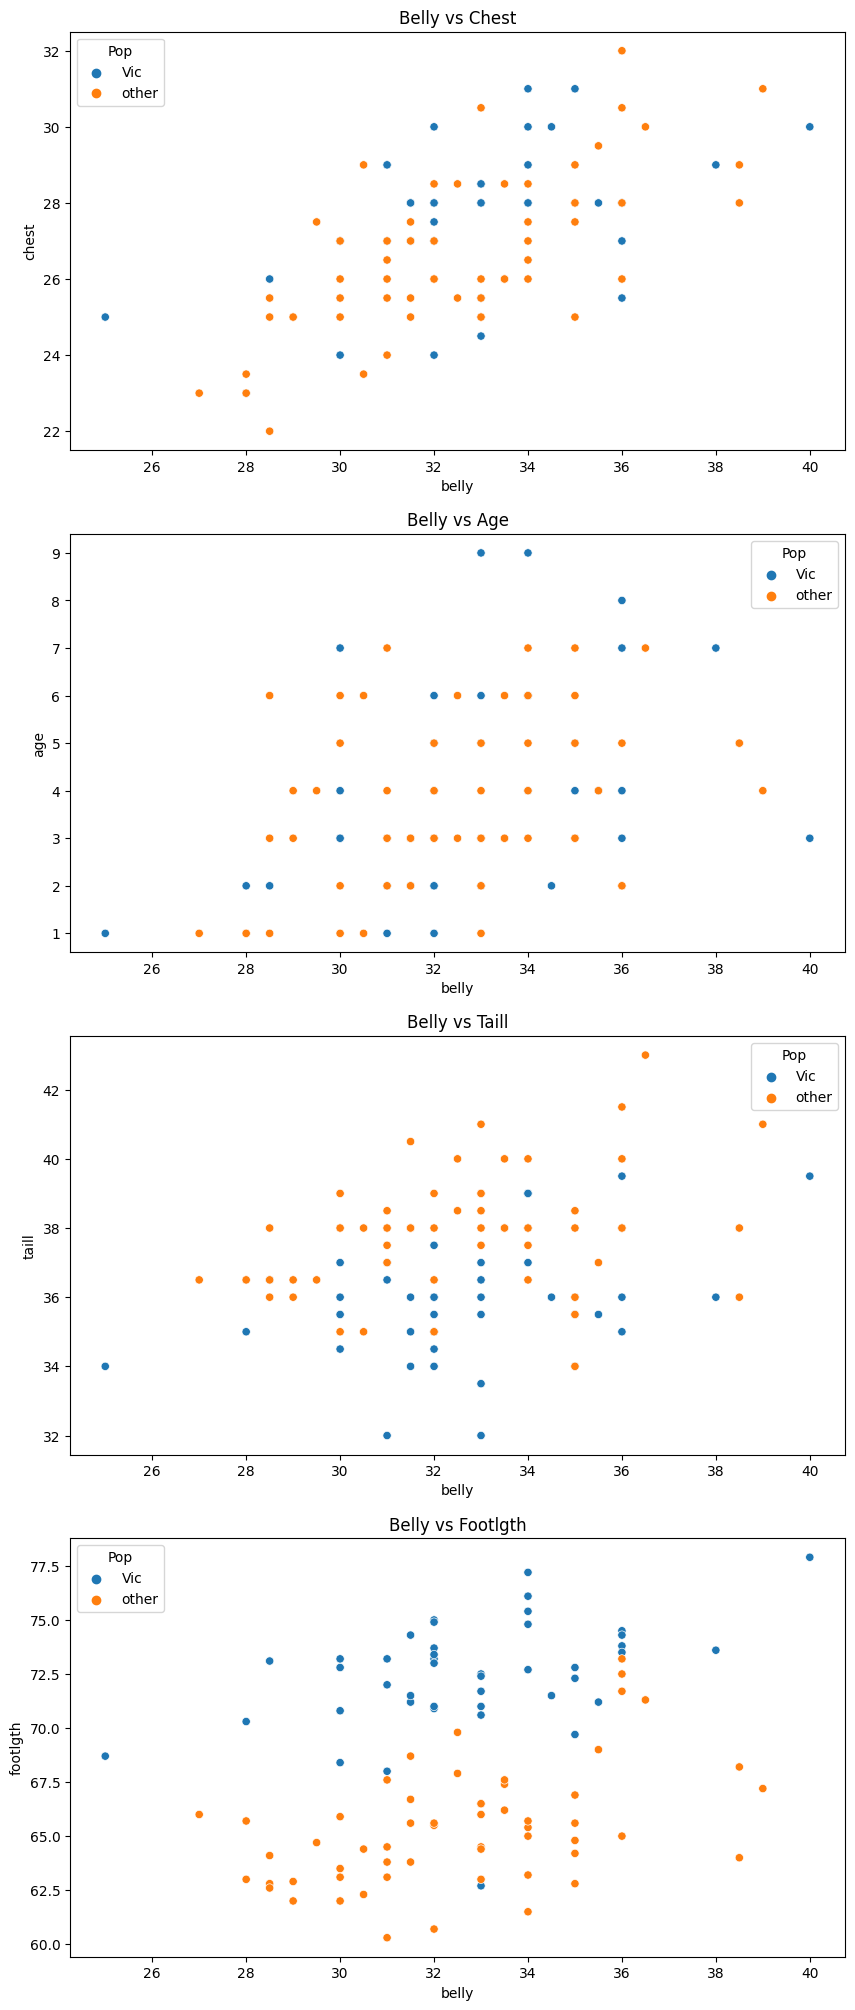

In [10]:
# Scatterplot of x = 'belly' vs. y = feature
fig, ax = plt.subplots(len(features),1, figsize = (10,25))
for i, y in zip(range(len(features)), features):
    sns.scatterplot(data = d, x = 'belly', y = y, hue = 'Pop', ax = ax[i])
    ax[i].set_title(f'{x[0].upper() + x[1:]} vs {y[0].upper() + y[1:]}')

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB
